## Introduction to Scikit-learn

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/Chapter_1_cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate_school,high_school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
my_lr = LogisticRegression() # as a best practice: explicitly provide every keyword parameter to the model when you create the object
my_lr

LogisticRegression()

In [5]:
my_lr.C = 0.1
my_lr.solver = 'liblinear'
my_lr

LogisticRegression(C=0.1, solver='liblinear')

In [6]:
X = df.EDUCATION[0:10].values.reshape(-1,1)
X.shape

(10, 1)

In [7]:
y = df['default payment next month'][0:10].values
y.shape

(10,)

In [8]:
my_lr.fit(X,y) # after this command the 'my_lr' object is a trained model!

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
new_X = df.EDUCATION[10:20].values.reshape(-1,1)
my_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

### Generating synthetic data

In [11]:
from numpy.random import default_rng

rg = default_rng(12345)
X = rg.uniform(low=0, high=10, size=(1000,)) # one-dimensional vector 1000x1

In [12]:
slope = 0.25
intercept = -1.25

y = slope * X + intercept + rg.normal(loc=0.0, scale=1.0, size=(1000, ))

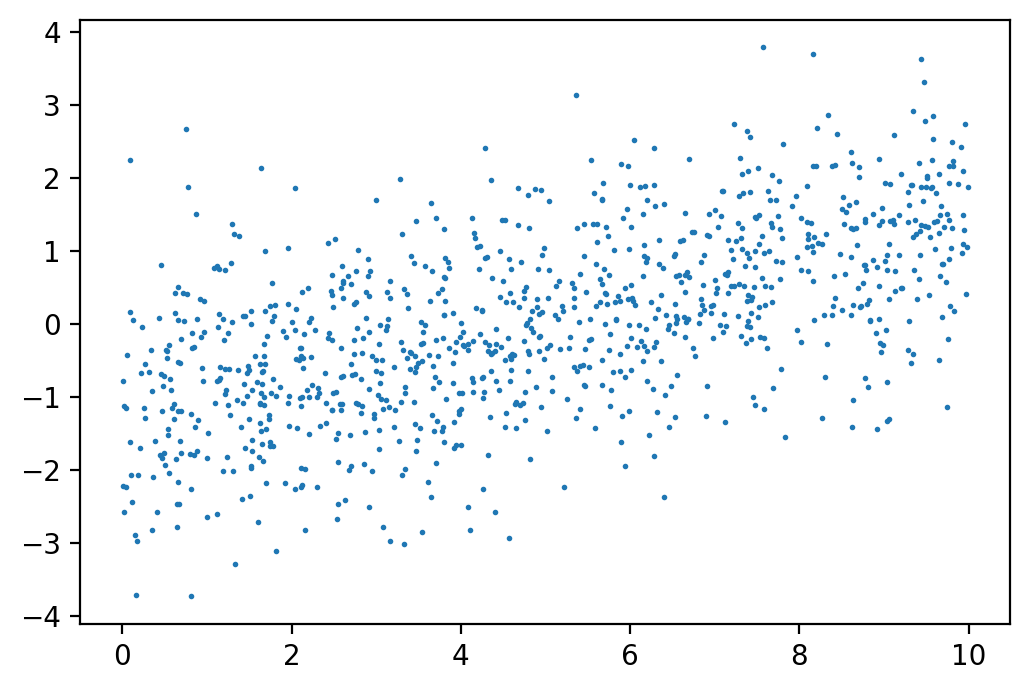

In [13]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi'] = 200 # 'dots per inch' selection

plt.scatter(X,y,s=1)
plt.show()

### Linear regression in Scikit-learn

In [14]:
from sklearn.linear_model import LinearRegression

my_linearR = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
my_linearR

LinearRegression()

In [15]:
y.shape

(1000,)

In [16]:
my_linearR.fit(X.reshape(-1,1), y)

LinearRegression()

In [17]:
my_linearR.coef_

array([0.25711689])

In [18]:
my_linearR.intercept_

-1.2522197212675905

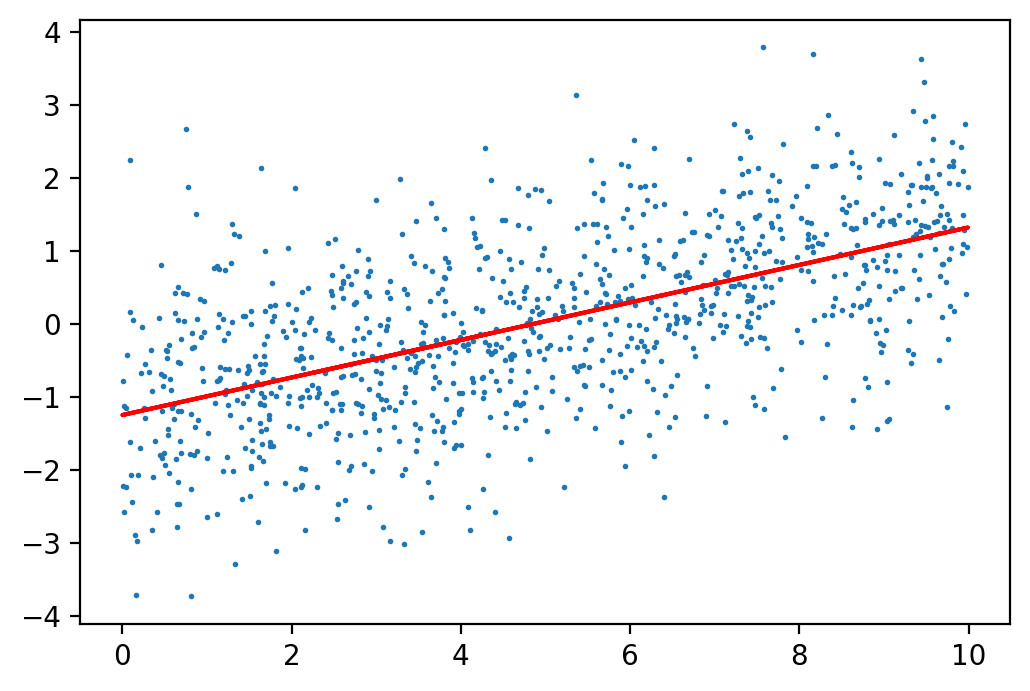

In [19]:
x_ = np.linspace(0, 10, 1000)
# l = X*my_linearR.coef_ + my_linearR.intercept_
y_pred = my_linearR.predict(X.reshape(-1,1))

# plt.plot(X, l, color='purple')
plt.plot(X, y_pred, color='red')
plt.scatter(X,y,s=1)

plt.show()

### Split the train and test data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.EDUCATION.values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)


In [21]:
n_rows_X_train = X_train.shape[0]
n_rows_X_test = X_test.shape[0]
n_rows_X_train/(n_rows_X_train + n_rows_X_test) # CHECK!

0.799992499249925

In [22]:
np.mean(y_train)

0.223102526838873

In [23]:
np.mean(y_test)

0.21657603600225014

In [24]:
np.mean(np.append(y_train, y_test))

0.2217971797179718

### Classification Accuracy

In [25]:
from sklearn.linear_model import LogisticRegression

example_lr = LogisticRegression(C=0.1, class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100,
                                multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)
example_lr

LogisticRegression(C=0.1, solver='liblinear')

In [26]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [27]:
y_pred = example_lr.predict(X_test)

In [28]:
is_correct = y_test == y_pred
np.mean(is_correct)

0.7834239639977498

In [29]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [30]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

If we compare our model 'example_lr'  to a null model that always predicts the majority negative class (which willbe right 78% of the time), an accuracy of 78% is actually not very useful.
There are binary classification metrics that delve a little deepr into how the model is performing for negative and positive samples.

### Exercise 2.02: Calculating the true and false positive and negative rates and confusion matrix

In [31]:
P = sum(y_test == 1)
N = sum(y_test == 0)
TP = sum((y_test == 1) & (y_pred == 1))
FP = sum((y_test == 0) & (y_pred == 1))
TN = sum((y_test == 0) & (y_pred == 0))
FN = sum((y_test == 1) & (y_pred == 0))

In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
print(f'TP: {TP}')
print(f'FN: {FN}')
print(f'TN: {TN}')
print(f'FP: {FP}')

TP: 0
FN: 1155
TN: 4178
FP: 0


In [36]:
TPR = TP/P
FNR = FN/P
TNR = TN/N
FPR = FP/N

In [33]:
print(f'TPR: {TPR}')
print(f'FNR: {FNR}')
print(f'TNR: {TNR}')
print(f'FPR: {FPR}')

TPR: 0.0
FNR: 1.0
TNR: 1.0
FPR: 0.0


our model does not miss out any negative sample!... On the other hand, it misses all positive samples (since TPR is 0.0)

In [40]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [41]:
P_hat = sum(y_pred == 1)
# precision = TP/P_hat # cuidado, P_hat = 0!

C:\Users\ElenaGutiérrezViedma\AppData\Local\Temp\ipykernel_18524\3663035734.py:2: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/P_hat


nan

### Exercise 2.03: Obtaining the predicted probabilities

In [45]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [46]:
y_pred_proba.shape 

(5333, 2)

In [47]:
y_test.shape

(5333,)

In [52]:
sum(np.sum(y_pred_proba, 1)) == y_test.shape[0] # Comprobamos que en todas las filas de y_pred_proba, la suma de las probabilidades es 1

True

In [55]:
np.unique(np.sum(y_pred_proba, 1))

array([1.])

In [57]:
pos_probs = y_pred_proba[:,1]
pos_probs

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

In [63]:
np.unique(pos_probs) # 4 probability values only

array([0.21207085, 0.22576598, 0.24007604, 0.2549944 ])

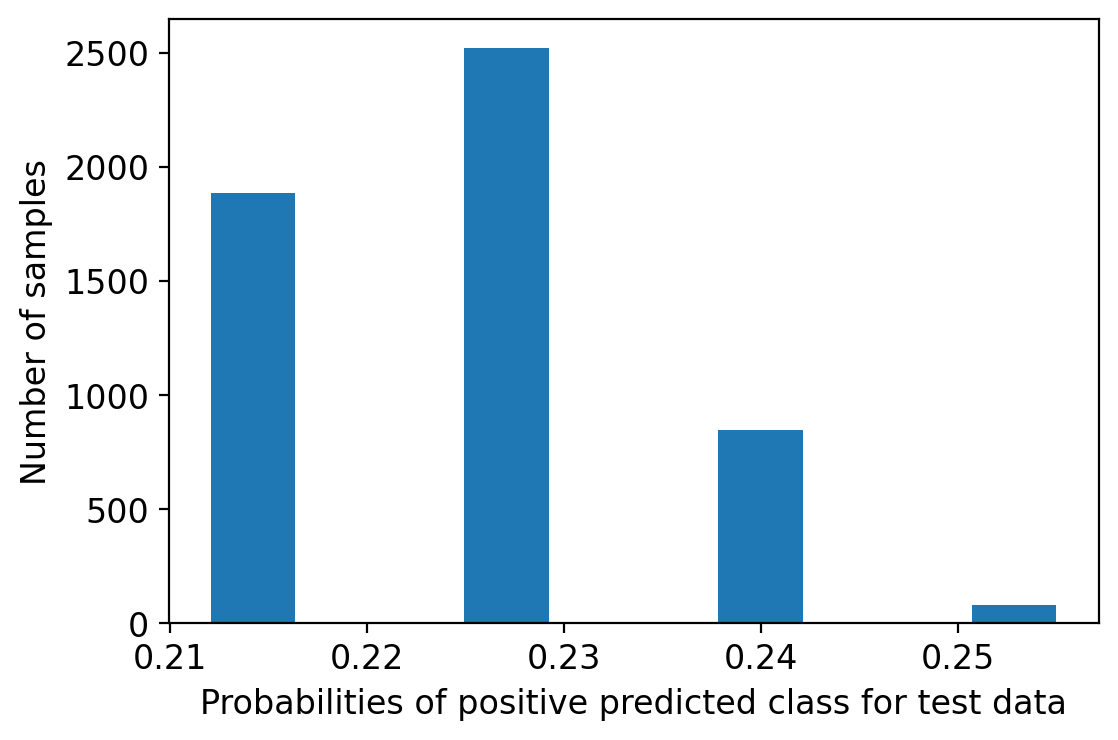

In [62]:
matplotlib.rcParams['font.size'] = 12 # adjust the font size

plt.hist(pos_probs) # Note that there are only 4 bins with samples in them, and they are spaced fairly far apart
# This means in particulary that if we try to adjust bins = X, the plot is going to ignore these values
# The reason is that there are 4 unique probability values and this is because the 
# feature EDUCATION only takes 4 possible values
plt.xlabel('Probabilities of positive predicted class for test data')
plt.ylabel('Number of samples')
plt.show()
